# Portfolio Analysis and Optimization

Created as an ongoing project which will be extended. Serves mainly as a practice of implementing financial portfolio theories.

In [194]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import quandl
import matplotlib.pyplot as plt
import scipy.stats as stats 
import pylab
from pandas_datareader import data as pdr

In [ ]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

## Get all available securities from Yahoo Finance

In [196]:
market = '^GSPC'
gold = 'GC=F'
asset_list = ['TSLA', 'AAPL', 'MSFT', 'GM']  # Gold, Tesla, Apple, Crude Oil, S&P 500, 

start, end = dt.datetime(2010,1,1), dt.datetime.now()
assets = pdr.DataReader(asset_list, 'yahoo', dt.date(2000,1,1), dt.date.today())
assets = assets['Adj Close'].dropna()
asset_returns = assets.pct_change().dropna()


## Plot stock prices and returns

<AxesSubplot:xlabel='Date'>

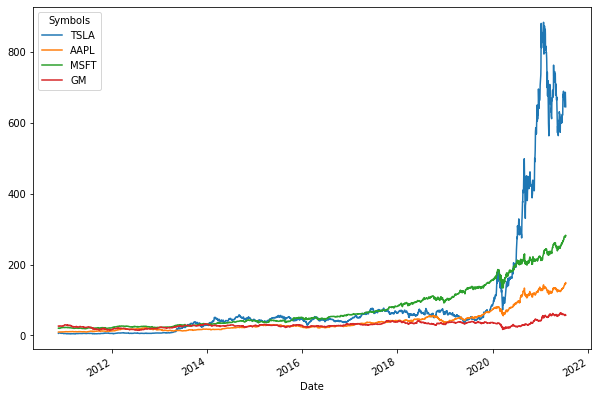

In [152]:
assets.plot(figsize=(10,7))

## Plot Return distribution and Q-Q Plot

[-0.2, 0.2, -0.2, 0.2, -0.2, 0.2, -0.2, 0.2]

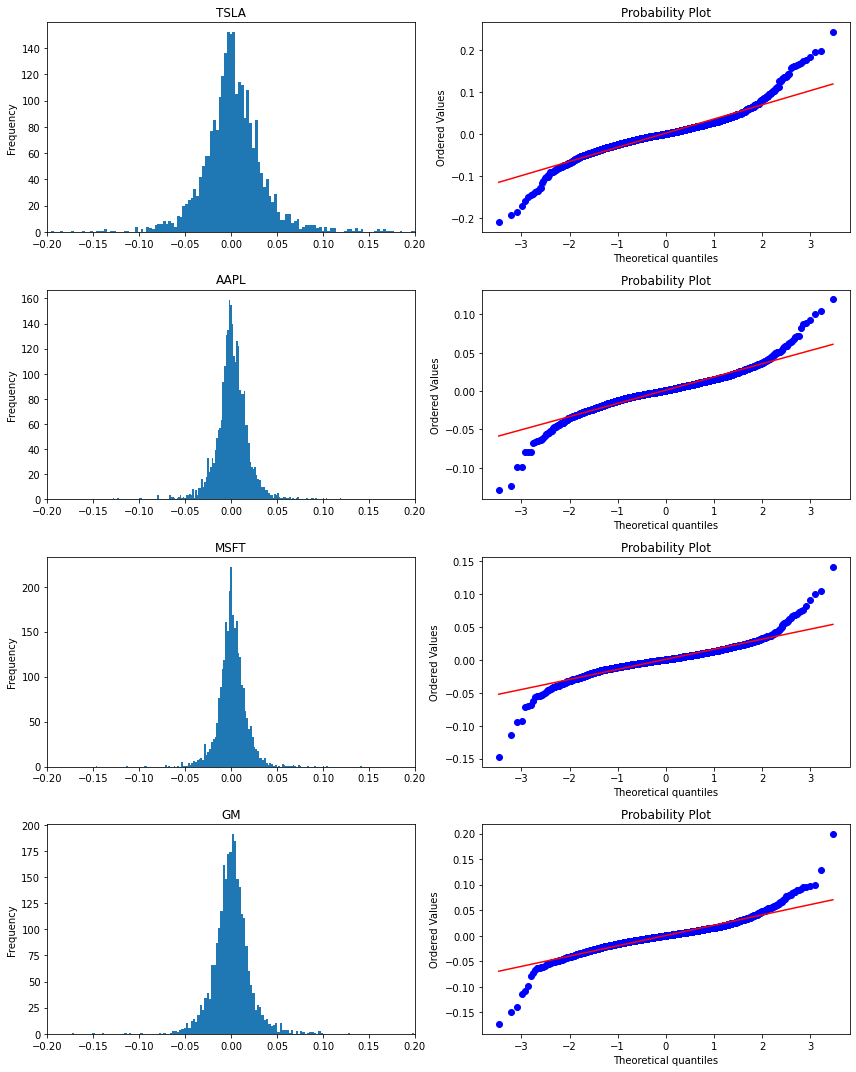

In [219]:
fig, ax = plt.subplots(4,2, figsize=(12,15))
bins = 150
asset_returns.iloc[:,0].plot.hist(bins=bins, ax=ax[0,0])
stats.probplot(asset_returns.iloc[:,0], dist='norm', plot=ax[0,1])
asset_returns.iloc[:,1].plot.hist(bins=bins, ax=ax[1,0])
stats.probplot(asset_returns.iloc[:,1], dist='norm', plot=ax[1,1])
asset_returns.iloc[:,2].plot.hist(bins=bins, ax=ax[2,0])
stats.probplot(asset_returns.iloc[:,2], dist='norm', plot=ax[2,1])
asset_returns.iloc[:,3].plot.hist(bins=bins, ax=ax[3,0])
stats.probplot(asset_returns.iloc[:,3], dist='norm', plot=ax[3,1])
ax[0,0].set_title(str(assets.keys()[0]))
ax[1,0].set_title(str(assets.keys()[1]))
ax[2,0].set_title(str(assets.keys()[2]))
ax[3,0].set_title(str(assets.keys()[3]))
fig.tight_layout()
plt.setp(ax[:,0], xlim=(-0.2,0.2))

<AxesSubplot:xlabel='Date'>

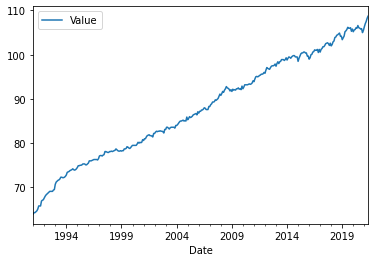

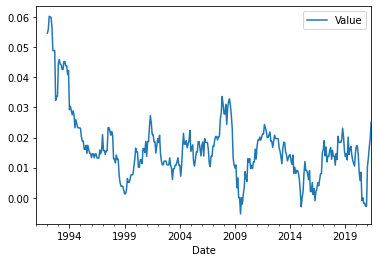

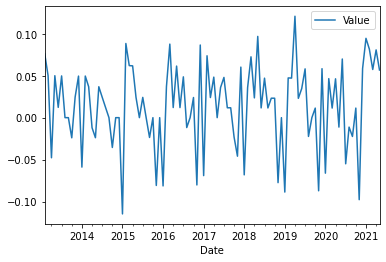

In [23]:
quandl.ApiConfig.api_key = "###"
mydata = quandl.get("RATEINF/CPI_DEU")
mydata[-1000:].plot()
(np.log(mydata/mydata.shift(12))).plot() #12months inflation rate
(((np.log(mydata/mydata.shift(1))+1)**12)-1)[-100:].plot() #monthly inflation rate (expressed as annual)